# Decision Tree
Conny Lin | June 13, 2020

In [2]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import other standard paths and local variables
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
datapath = localpaths['datapath']

# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

getting host computer specific paths


# rough examination

In [1]:
# get standard machine learning input data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, X_test, y_train, y_test = Nutcracker(datapath).mldata(feature_reduction='None')

getting host computer specific paths
None
None


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# test set up
n_max_depth = 10
# Instantiate the model & fit it to our data
MLmodel = DecisionTreeClassifier(max_depth=n_max_depth)
MLmodel.fit(X_train, y_train)
# Score the model on the test set
train_score = MLmodel.score(X_train,y_train)
test_score = MLmodel.score(X_test,y_test)

In [7]:
print(f"The TRAIN classification accuracy is:  {train_score:.5f}")
print(f"The TEST classification accuracy is:  {test_score:.5f}")

The TRAIN classification accuracy is:  0.87067
The TEST classification accuracy is:  0.86579


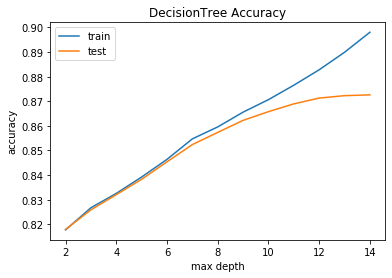

In [9]:
# try some depths values
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Decision Tree -  data
depth_values = list(range(2,15))
random_state = 318
train_accs = []
test_accs = []

# Loop over different max_depths
for d in depth_values:
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth=d, random_state=random_state)
    my_dt.fit(X_train, y_train)
    # Evaluate on train & test data
    train_accs.append( my_dt.score(X_train, y_train) )
    test_accs.append( my_dt.score(X_test, y_test) )
    
# Plot the results
plt.figure()
plt.plot(depth_values, train_accs, label='train')
plt.plot(depth_values, test_accs, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy')
plt.show()

max depth over 6-8 starts to overtrain.

In [11]:
train_accs

[0.8179225,
 0.8258825,
 0.8320525,
 0.8382925,
 0.8454025,
 0.852405,
 0.857355,
 0.8622375,
 0.8657875,
 0.8689475,
 0.8713025,
 0.872285,
 0.872615]

gridsearch takes a long time. try to narrow down the range
* max_depth = np.arange(6,9) 
* min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
* min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
* max_features = list(range(1, X_train.shape[1]))

## test max_features - run on AG
* max_features = {“auto”, “sqrt”, “log2”}
* max_depth = 8 (np.arange(6,9))
* min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
* min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
* max_features = list(range(1, X_train.shape[1]))

In [15]:
# try some depths values
import os, time
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# get standard machine learning input data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, X_test, y_train, y_test = Nutcracker(datapath).mldata(feature_reduction='None')

# set up time
start_time_all = time.time()
print('timer start')
print(f'test timer {(time.time() - start_time_all)/60:.2f} min')
# hyperparameters
random_state = 318
max_depth = 8
max_features_list = ['sqrt','log2']

# declare output var
test_acc = []
train_acc = []
# test hyperparameter
for max_features in max_features_list:
    print(f'running {max_features}')
    # set up time
    start_time = time.time()
    # start model
    model = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth, max_features=max_features)
    model.fit(X_train, y_train)
    # get train score
    train_score = model.score(X_train, y_train)
    print(f"\tTrain Score: {train_score}")
    train_acc.append(train_score)
    # get test score
    test_score = model.score(X_test, y_test)
    test_acc.append(train_score)
    print(f"\tTest Score: {test_score}")
    # print time elapsed
    print(f'\ttook {(time.time() - start_time)/60:.2f} min')

# set up time
print(f'total time: {(time.time() - start_time_all)/60:.2f} min')

# graph results
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(range(len(max_features_list)), train_scores, test_scores, 'max features', 'Decision Tree')

None
None
timer start
test timer 0.00 min
running sqrt
	Train Score: 0.82295875
	Test Score: 0.8212775
	took 0.21 min
running log2
	Train Score: 0.82295875
	Test Score: 0.8212775
	took 0.20 min
total time: 0.42 min


ValueError: x and y must have same first dimension, but have shapes (2,) and (0,)

similar results from activation = sqrt or log 2

In [ ]:
# example of grid searching key hyperparametres for ridge classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# define models and parameters
model = DecisionTreeClassifier()
max_depth = np.arange(1,32)
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1, X_train.shape[1]))
random_state = [318]

grid = dict(max_depth=max_depth, min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features, random_state=random_state)

# import data
print(f'import data')
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, _, y_train, _ = Nutcracker(datapath).mldata(feature_reduction='None')

# grid search setting
cv = 5 #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy',error_score=0, verbose=3)
# run gridsearch
grid_result = grid_search.fit(X_train, y_train)

# summarize results
from brainstation_capstone.ml import GridSearchCVHelper
mean, stdev, param = GridSearchCVHelper.print_summary(grid_result)
print('done')

None
None
Fitting 5 folds for each of 31000 candidates, totalling 155000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 99.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 148.7min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 174.8min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 209.2min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 235.5min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 251.2min


In [ ]:
# visualize tree
# summarize results
from brainstation_capstone.ml import GridSearchCVHelper
mean, stdev, param = GridSearchCVHelper.print_summary(grid_result)
print('done')

## test max_features - run on AG | June 19, 2020 15:17
To test:
* max_features = list(range(1, X_train.shape[1]))
* min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
* min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
Tested:
* max_depth = 8 (np.arange(6,9)) over 8 has diminishing returns.
* max_features = {“sqrt”, “log2”} are both similar. 


In [4]:
from sklearn.tree import DecisionTreeClassifier

# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

# hyperparameters
max_features_list = np.arange(1, data['X_train'].shape[1])
random_state = 318
max_depth = 8

# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in max_features_list:
    print(f'running {parameter}')
    # set up time
    timer.param_start()
    # start model
    model = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth, max_features=parameter)
    model_acc.score_data(model, data)
    timer.param_end()

    
# get time
timer.session_end()
time_per_session = timer.get_time()
# get scores
print(model_acc.train_acc)
print(model_acc.test_acc)


loading 4 files
loading completed
timer starts
running 1
	Train Score: 0.659291875
	Test Score: 0.6578125
	elapsed time 0.093min
running 2
	Train Score: 0.737980625
	Test Score: 0.7363875
	elapsed time 0.129min
running 3
	Train Score: 0.790129375
	Test Score: 0.7889525
	elapsed time 0.160min
running 4
	Train Score: 0.82295875
	Test Score: 0.8212775
	elapsed time 0.227min
running 5
	Train Score: 0.83895
	Test Score: 0.8382925
	elapsed time 0.237min
running 6
	Train Score: 0.849538125
	Test Score: 0.84889
	elapsed time 0.291min
running 7
	Train Score: 0.843399375
	Test Score: 0.8416925
	elapsed time 0.287min
running 8
	Train Score: 0.8537025
	Test Score: 0.8518325
	elapsed time 0.320min
running 9
	Train Score: 0.852606875
	Test Score: 0.85043
	elapsed time 0.352min
running 10
	Train Score: 0.853561875
	Test Score: 0.8516175
	elapsed time 0.375min
running 11
	Train Score: 0.854734375
	Test Score: 0.85261
	elapsed time 0.406min
running 12
	Train Score: 0.85717
	Test Score: 0.8557375
	elaps

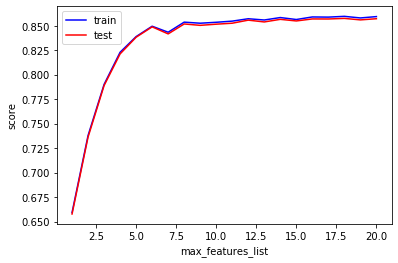

In [5]:
# graph
hyperparameter_list = max_features_list

from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, 'max_features_list')

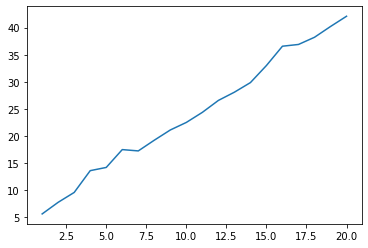

In [7]:
plt.figure()
plt.plot(hyperparameter_list, time_per_session)
plt.show()


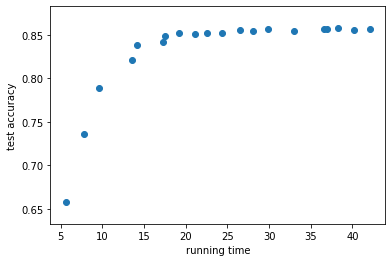

In [9]:
# plot gain of accuracy vs time spent
plt.figure()
plt.scatter(time_per_session, model_acc.test_acc)
plt.xlabel('running time')
plt.ylabel('test accuracy')
plt.show()

In [10]:
hyperparameter_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

at about 7-8 max feature list, gain of accuracy outweight running time it takes.

## tune min_samples_leaf 20200619-1631 AG

loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3loading completed
timer starts
running 0.1
	Train Score: 0.730025625
	Test Score: 0.7302975
	elapsed time 0.137min
running 0.2
	Train Score: 0.67888625
	Test Score: 0.6797625
	elapsed time 0.096min
running 0.30000000000000004
	Train Score: 0.6811875
	Test Score: 0.68218
	elapsed time 0.087min
running 0.4
	Train Score: 0.690823125
	Test Score: 0.6914925
	elapsed time 0.056min
running 0.5
	Train Score: 0.500074375
	Test Score: 0.4997025
	elapsed time 0.046min
total time: 0.422 min


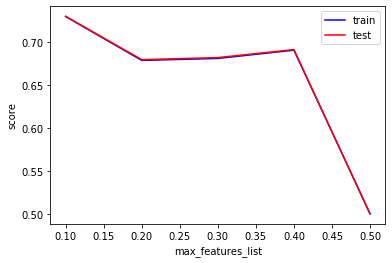

In [11]:
from sklearn.tree import DecisionTreeClassifier
# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])
# hyperparameters
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
hyperparameter_list = min_samples_leaf
hyperparameter_name = 'min_samples_leaf'
max_features = 7
random_state = 318
max_depth = 8
# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {parameter}')
    timer.param_start()
    # update here
    model = DecisionTreeClassifier(random_state=random_state, max_depth=max_depth, max_features=max_features, min_samples_leaf=parameter)
    model_acc.score_data(model, data)
    timer.param_end()  
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
